<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
# A:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [3]:
df = pd.read_csv(sac_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
df.isnull().sum()


street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [5]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [6]:
# A:
#df['zip']=df['zip'].apply(lambda x:str(x))
#df['zip']

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [7]:
# A:
import numpy as np
import pandas as pd
#	city	zip	state	beds	baths	sq__ft	type	sale_date	price	latitude	longitude
# Create dataframe of main data to use as predictors (later). AKA "X"

X = df[['beds', 'baths', 'sq__ft','sale_date']]
#X['intercept'] = 1.
X = X.values

# target vector (price)
df=df[df['city']=='SACRAMENTO']
df=df[(df['sq__ft']>0)]
df=df[df['price']>=30000]
y=df['price'].values
df.shape

(423, 12)

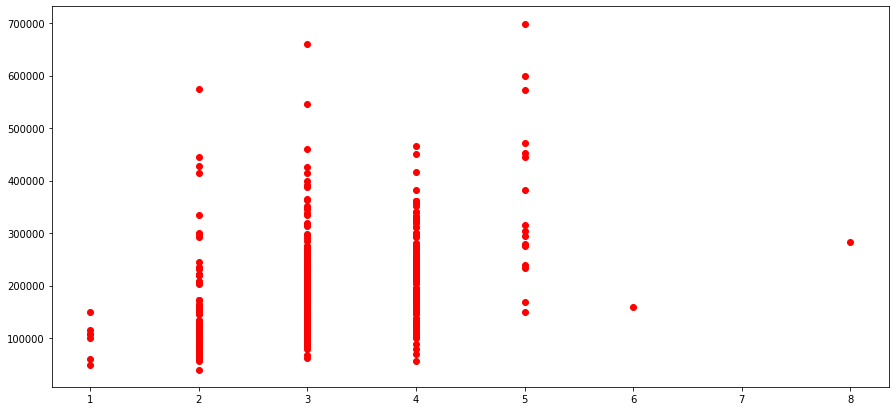

In [8]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on CARAT with our data
ax.scatter(df['beds'], y, c='r')


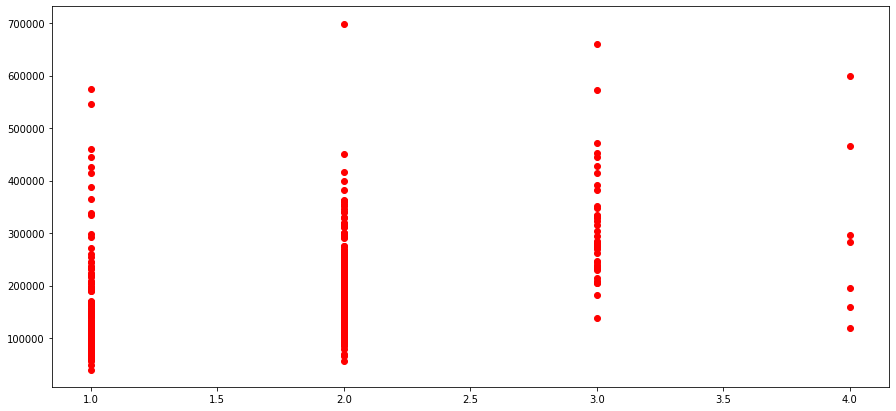

In [9]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on CARAT with our data
ax.scatter(df['baths'], y, c='r')


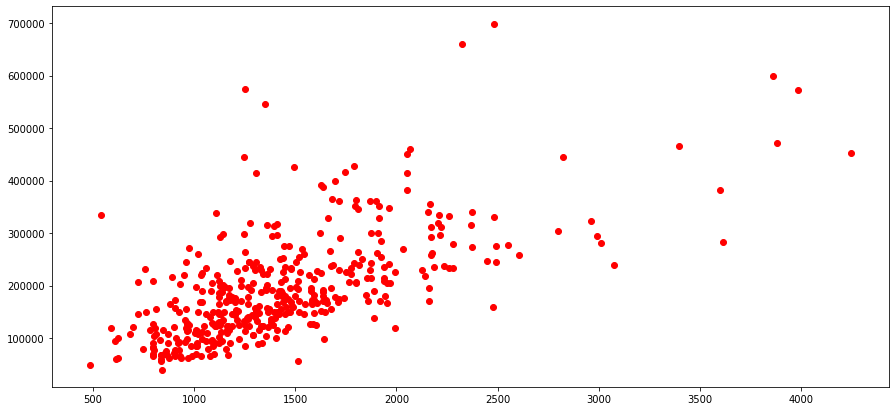

In [10]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on CARAT with our data
ax.scatter(df['sq__ft'], y, c='r')


In [11]:
df['price'].sort_values()

335     40000
336     48000
605     55422
867     56950
0       59222
        ...  
328    572500
853    575000
855    598695
156    660000
333    699000
Name: price, Length: 423, dtype: int64

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [12]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [13]:
# A:sq feet

In [14]:
lr=LinearRegression()

In [15]:
X = df[['sq__ft']]
#X['intercept'] = 1.
X = X.values

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [16]:
# A:
def getInterceptSlope(a,b):
    lr.fit(a,b)
    return lr.intercept_,lr.coef_

In [17]:
getInterceptSlope(X,y)

(22302.3635853125, array([119.21040263]))

### 6. Interpret the intercept. Interpret the slope.

In [18]:
# A:
# intercept when the the house is the smallest
# slope is the increment of price per sq ft

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:
When the house is bigger, the price will be more expensive.
The house is expensive because it is big.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [19]:
# A:
predictions=lr.predict(X) #use X predictors to predict yhat
print(X.shape)
len(predictions)

(423, 1)


423

In [20]:
residuals = y - predictions
len(residuals)

423

In [21]:
residuals.mean()

-5.504270535552473e-12

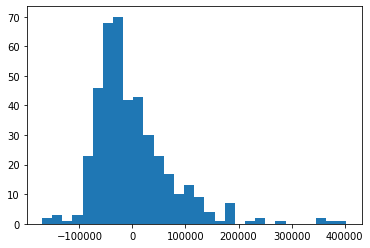

In [22]:
plt.hist(residuals,bins=30);

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables / One-Hot Encoding

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [23]:
# A:
dum=pd.get_dummies(df['type'],drop_first=True)
dum.head()
#dum.shape

,Multi-Family,Residential
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [24]:
# A:
#Code:

df=pd.merge(df,dum,how='inner',left_index=True,right_index=True)
df.head()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


In [25]:
#zipcode=pd.get_dummies(df['zip'].values)
#zipcode

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

# Model Building


In [26]:
list(df.columns)

['street',
 'city',
 'zip',
 'state',
 'beds',
 'baths',
 'sq__ft',
 'type',
 'sale_date',
 'price',
 'latitude',
 'longitude',
 'Multi-Family',
 'Residential']

In [27]:
y=df['price'].values

# X are the predictors Y is the target

## Use Sklearn to load data

In [28]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from matplotlib import pyplot as plt

%matplotlib inline

model = LinearRegression()

## Put data into pandas dataframe

In [29]:
import numpy as np
import pandas as pd

# Create dataframe of main data to use as predictors (later). AKA "X"
df = pd.DataFrame(df.loc[:,['beds','baths','sq__ft','Multi-Family','Residential']], columns=['beds','baths','sq__ft','Multi-Family','Residential'])


# target vector (price)
target = pd.DataFrame(y)

print(target.shape)
print(df.shape)
df.head()

(423, 1)
(423, 5)


,beds,baths,sq__ft,Multi-Family,Residential
0,2,1,836,0,1
1,3,1,1167,0,1
2,2,1,796,0,1
3,2,1,852,0,1
4,2,1,797,0,1


In [32]:
target.head()

,0
0,59222
1,68212
2,68880
3,69307
4,81900


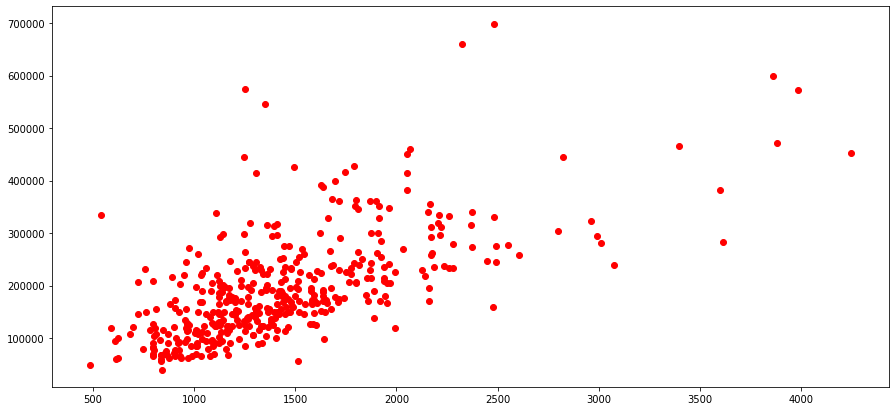

In [34]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on CARAT with our data
ax.scatter(df['sq__ft'], target, c='r')


## Fit model with SKlearn
**Below we fit a linear regression model predicting `price` (the target vector) from `sq__ft`.**

> **Note:** sklearn models expect the predictor matrix to be 2D and the target to be 1D.

In [36]:
lm = LinearRegression()

X = df[['sq__ft']]
y = target 

model = lm.fit(X, y)
print(model.coef_)
print(model.intercept_)

[[119.21040263]]
[22302.36358531]


**Make predictions for the X matrix using `.predict(X)`, and score the model ($R^2$) using `model.score(X, y)`.**

Plot the predicted values against the true values of the target, and print the model $R^2$.

> **`.score(predictors, target)`**: a class method / function that returns the coefficient of determination R^2 of the prediction (for regression models).  Found in many models in scikit-learn (but not all).

0.42547098607651757


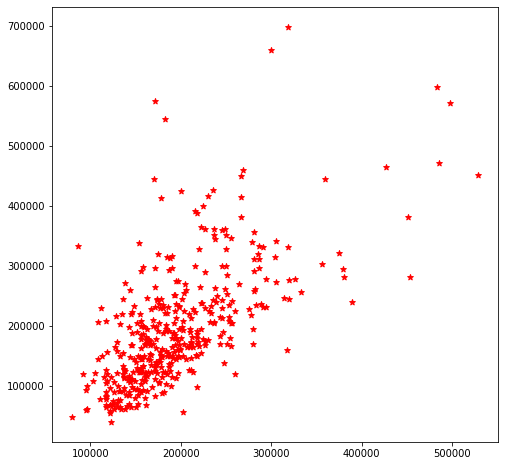

In [37]:
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
# create a figure
fig = plt.figure(figsize=(8,8))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on X with our data
ax.scatter(predictions, y, c='r',marker='*')
print(score)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

print(np.sqrt(mean_squared_error(target, predictions)))
print(r2_score(target, predictions))

76119.01581902156
0.42547098607651757


In [ ]:
model.fit(X,y)


### My Own Notes

All categorical data should do one-hot encoding. Like ZIP code

In [ ]:
y=df['price'].values
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on CARAT with our data
ax.scatter(df['zip'], y, c='r')

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [ ]:
# A:
y_bar = df['Y'].mean()
x_bar = df['X'].mean()
std_y = np.std(df['Y'], ddof = 1) #ddof-degree of freedom
std_x = np.std(df['X'], ddof = 1) 
r_xy = df.corr().loc['X','Y'] #lr.coef_
beta_1 = r_xy*(std_y/std_x)
beta_0 = y_bar - beta_1*x_bar

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [ ]:
# A:

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A: